In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# Ex. 8

In [7]:
dataset_file = '../datasets/Auto.csv'
data = pd.read_csv(dataset_file, index_col='name')
data = data.loc[data.horsepower != '?']
data.horsepower = data.horsepower.apply(int)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [8]:
import statsmodels.api as sm

In [10]:
model = sm.OLS(data.mpg, sm.add_constant(data.horsepower)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           7.03e-81
Time:                        15:07:47   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model.get_prediction([1, 98]).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,24.467077,0.251262,23.973079,24.961075,14.809396,34.124758


Small p-value shows that there is definetely a relationship between `mpg` and `horsepower` variables. R squared shows that 60.6 % of variability in `mpg` is explained by `horsepower`, and negative coeficient for `horsepower` shows that relationship is negative.

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

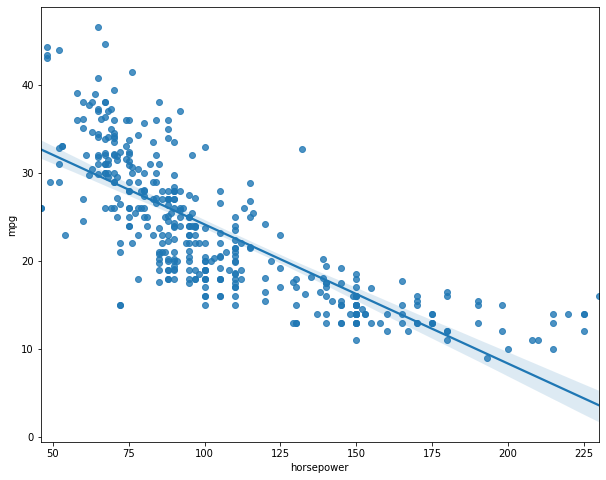

In [22]:
plt.figure(figsize=(10, 8))
sns.regplot(data.horsepower, data.mpg)

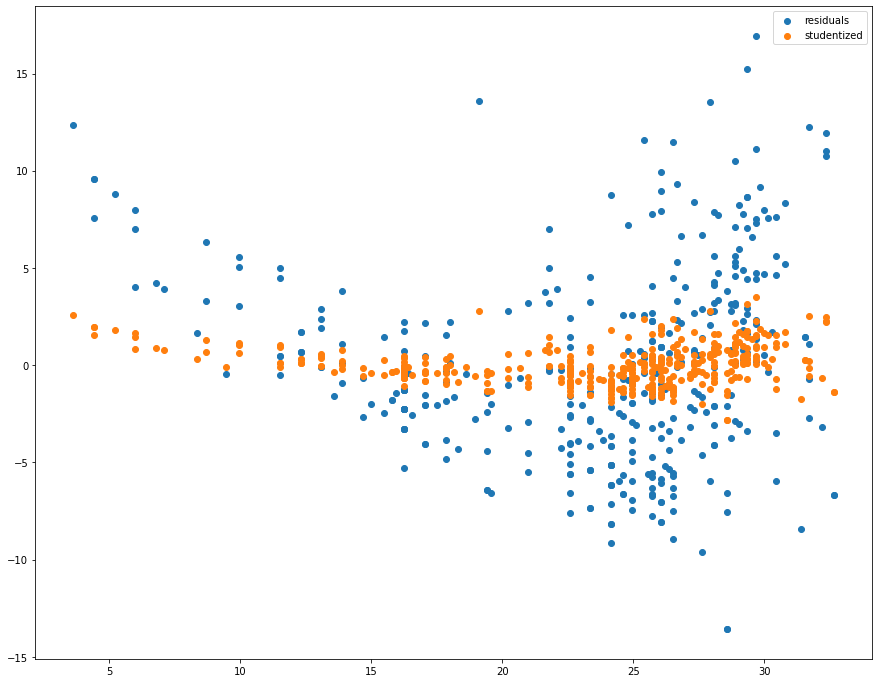

In [24]:
plt.figure(figsize=(15, 12))
predictions = model.predict(sm.add_constant(data.horsepower))
residuals = data.mpg - predictions
plt.scatter(predictions, residuals, label='residuals')
studentized = model.get_influence().resid_studentized_external
plt.scatter(predictions, studentized, label='studentized')
plt.legend()

In [30]:
log_term = np.log(data.horsepower)
log_term.name = 'horsepower_2'
log_X = pd.concat([data.horsepower, new_term], axis=1)
log_model = sm.OLS(data.mpg, sm.add_constant(log_X)).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     416.6
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           1.98e-97
Time:                        22:05:38   Log-Likelihood:                -1136.8
No. Observations:                 392   AIC:                             2280.
Df Residuals:                     389   BIC:                             2292.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          156.0406     12.083     12.914      0.000     132.285     179.796
horsepower       0.1185      0.029      4.044      0.000       0.061       0.176
horsepower_2   -31.5982      3.284     -9.623      0.000     -38.054     -25.142
==============================================================================
Omnibus:                       17.484   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.245
Skew:                           0.162   Prob(JB):                     3.01e-09
Kurtosis:                       4.516   Cond. No.                     6.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
squred_term = data.horsepower ** 2
squred_term.name = 'horsepower^2'
squred_X = pd.concat([data.horsepower, new_term], axis=1)
squred_model = sm.OLS(data.mpg, sm.add_constant(squred_X)).fit()
squred_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     416.6
Date:                Sun, 30 Aug 2020   Prob (F-statistic):           1.98e-97
Time:                        22:05:40   Log-Likelihood:                -1136.8
No. Observations:                 392   AIC:                             2280.
Df Residuals:                     389   BIC:                             2292.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          156.0406     12.083     12.914      0.000     132.285     179.796
horsepower       0.1185      0.029      4.044      0.000       0.061       0.176
horsepower_2   -31.5982      3.284     -9.623      0.000     -38.054     -25.142
==============================================================================
Omnibus:                       17.484   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.245
Skew:                           0.162   Prob(JB):                     3.01e-09
Kurtosis:                       4.516   Cond. No.                     6.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Ex. 9

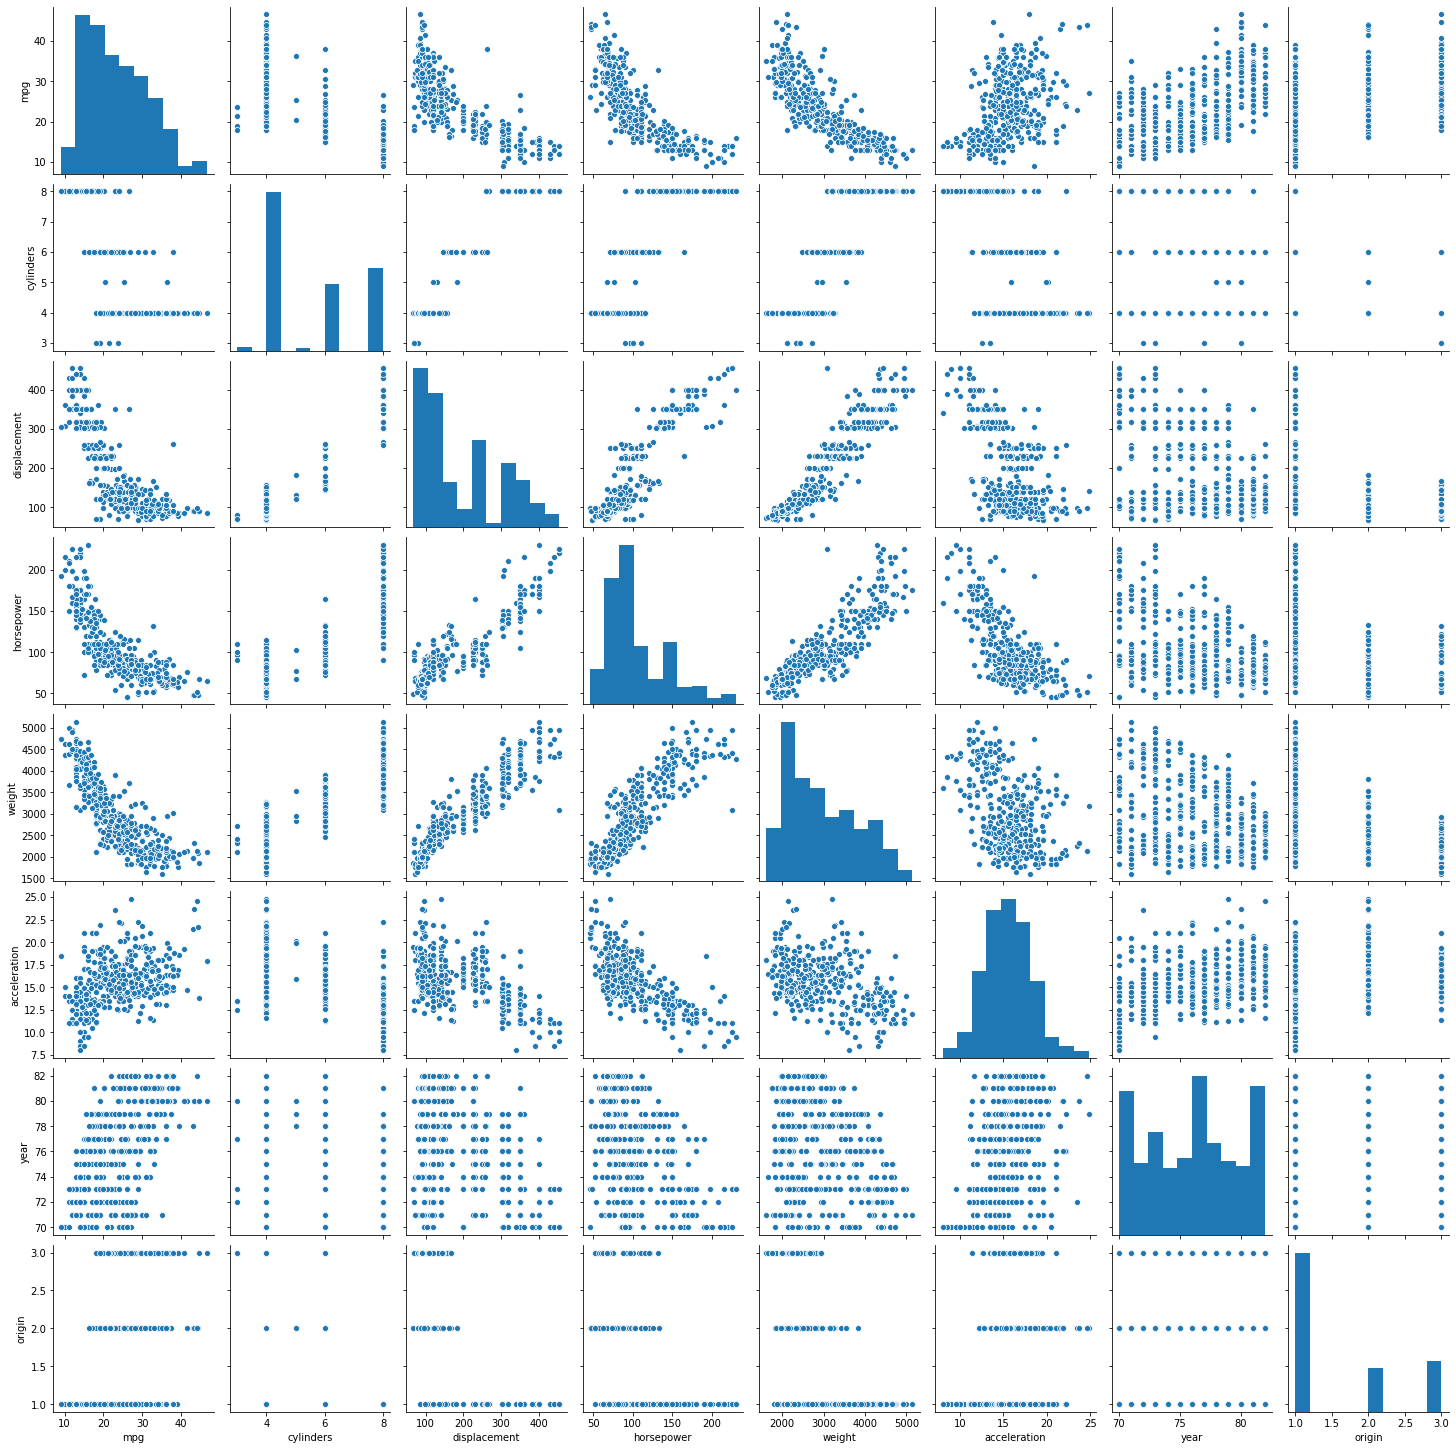

In [34]:
sns.pairplot(data=data)

<AxesSubplot:>

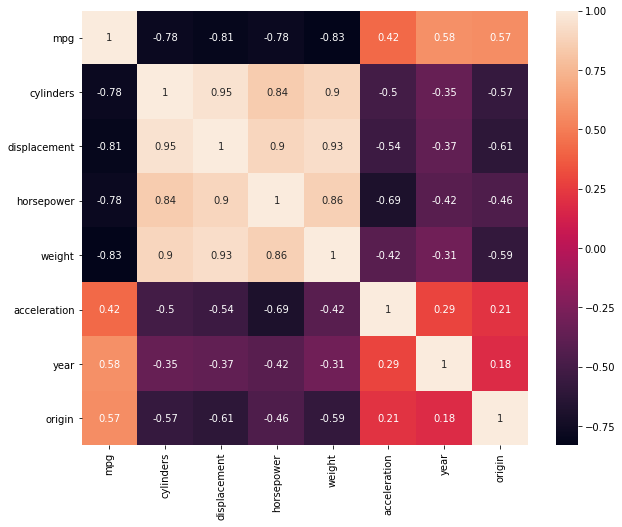

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True)

In [50]:
cyl_dummies = pd.get_dummies(data.cylinders).drop([8], axis=1)
cyl_dummies.columns = ['cyl_3', 'cyl_4', 'cyl_5', 'cyl_6']
origin_dummies = pd.get_dummies(data.origin).drop([3], axis=1)
origin_dummies.columns = ['origin_1', 'origin_2']
data_with_dummies = pd.concat([data.drop(['mpg', 'cylinders', 'origin'], axis=1), cyl_dummies, origin_dummies], axis=1)
data_with_dummies.head()

,displacement,horsepower,weight,acceleration,year,cyl_3,cyl_4,cyl_5,cyl_6,origin_1,origin_2
name,,,,,,,,,,,
chevrolet chevelle malibu,307.0,130,3504,12.0,70,0,0,0,0,1,0
buick skylark 320,350.0,165,3693,11.5,70,0,0,0,0,1,0
plymouth satellite,318.0,150,3436,11.0,70,0,0,0,0,1,0
amc rebel sst,304.0,150,3433,12.0,70,0,0,0,0,1,0
ford torino,302.0,140,3449,10.5,70,0,0,0,0,1,0


In [55]:
multi_model = sm.OLS(data.mpg, sm.add_constant(data.drop(['mpg'], axis=1))).fit()
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          2.04e-139
Time:                        22:38:02   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
multi_model_2 = sm.OLS(data.mpg, sm.add_constant(data_with_dummies)).fit()
multi_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 30 Aug 2020   Prob (F-statistic):          2.39e-147
Time:                        22:38:14   Log-Likelihood:                -993.35
No. Observations:                 392   AIC:                             2011.
Df Residuals:                     380   BIC:                             2058.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -14.3637      4.631     -3.102      0.002     -23.469      -5.258
displacement     0.0187      0.007      2.590      0.010       0.005       0.033
horsepower      -0.0349      0.013     -2.639      0.009      -0.061      -0.009
weight          -0.0058      0.001     -9.154      0.000      -0.007      -0.005
acceleration     0.0260      0.093      0.279      0.780      -0.157       0.209
year             0.7370      0.049     15.064      0.000       0.641       0.833
cyl_3           -5.0992      2.109     -2.418      0.016      -9.246      -0.953
cyl_4            1.6226      1.228      1.322      0.187      -0.792       4.037
cyl_5            1.9792      2.105      0.940      0.348      -2.160       6.118
cyl_6           -1.7480      0.797     -2.193      0.029      -3.315      -0.181
origin_1        -2.6172      0.527     -4.964      0.000      -3.654      -1.581
origin_2        -0.8532      0.546     -1.564      0.119      -1.926       0.220
==============================================================================
Omnibus:                       45.781   Durbin-Watson:                   1.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.634
Skew:                           0.677   Prob(JB):                     2.54e-19
Kurtosis:                       4.846   Cond. No.                     9.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Model 2')

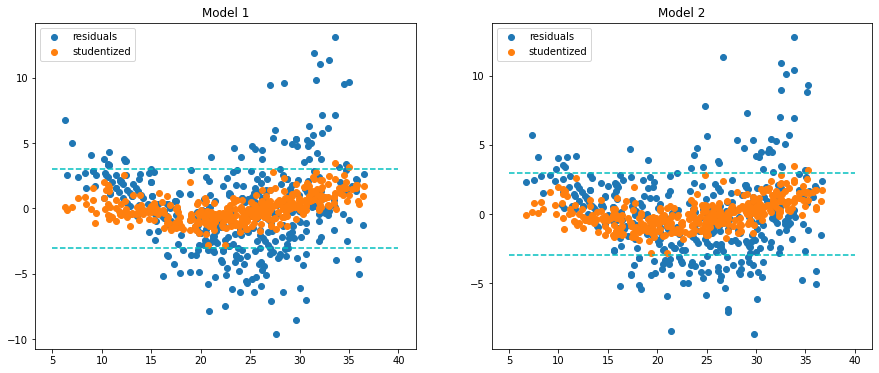

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
line = np.linspace(5, 40, 50)

predictions = multi_model.predict(sm.add_constant(data.drop(['mpg'], axis=1)))
residuals = data.mpg - predictions
axes[0].scatter(predictions, residuals, label='residuals')
studentized = model.get_influence().resid_studentized_external
axes[0].scatter(predictions, studentized, label='studentized')
axes[0].legend()
axes[0].plot(line, np.full(line.shape, 3), 'c--')
axes[0].plot(line, np.full(line.shape, -3), 'c--')
axes[0].set_title('Model 1')

predictions = multi_model_2.predict(sm.add_constant(data_with_dummies))
residuals = data.mpg - predictions
axes[1].scatter(predictions, residuals, label='residuals')
studentized = model.get_influence().resid_studentized_external
axes[1].scatter(predictions, studentized, label='studentized')
axes[1].legend()
axes[1].plot(line, np.full(line.shape, 3), 'c--')
axes[1].plot(line, np.full(line.shape, -3), 'c--')
axes[1].set_title('Model 2')

F-statistic is far from 1, which means that there is a relationship between predictors and response. P-values show that `displacement`, `weight`, `year` and `origin` have relationship to `mpg`, but `cylinders`, `horsepower` and `acceleration` do not. `year` coeffitient shows for how much `mpg` increases with each year.

13

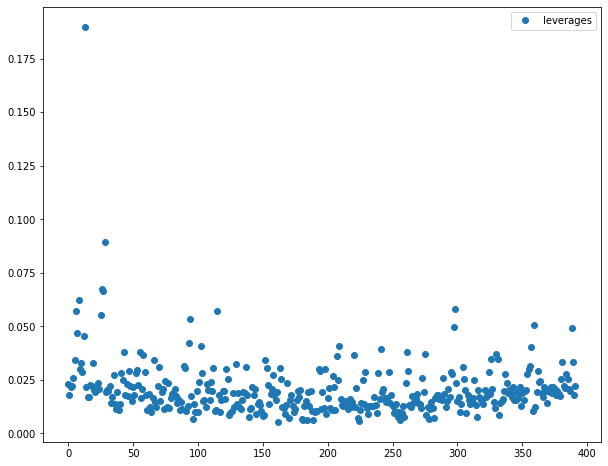

In [85]:
plt.figure(figsize=(10, 8))
hat_values = multi_model.get_influence().hat_matrix_diag
plt.plot(hat_values, 'o', label='leverages')
plt.legend()
hat_values.argmax()

In [89]:
print(residuals[13])
residuals.describe()

-3.6859154442224167


count    3.920000e+02
mean     1.053126e-13
std      3.053786e+00
min     -8.679687e+00
25%     -1.937324e+00
50%     -6.777841e-02
75%      1.671145e+00
max      1.277558e+01
dtype: float64

Residual plot shows some pattern in residuals, which tells us that data is non-linear. Also there is some outliers (studentized values > 3) at residual plot. Leverages plot show one significant point with high leverage